In [2]:
%pip install polars

  Using cached polars-1.34.0-py3-none-any.whl.metadata (10 kB)
  Using cached polars_runtime_32-1.34.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.5 kB)
Using cached polars-1.34.0-py3-none-any.whl (772 kB)
Using cached polars_runtime_32-1.34.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.3 MB)

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


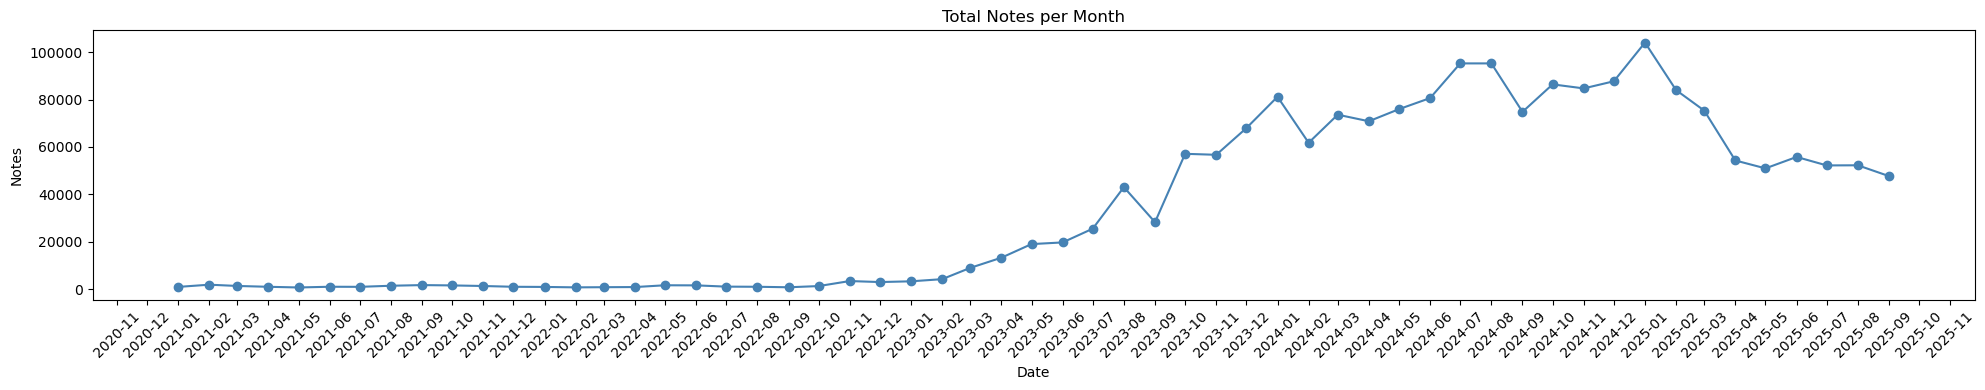

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Load the CSV generated earlier ---
monthly_totals_pd = pd.read_csv(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/monthly_groups.csv"
)

# Combine year + month into a single datetime column
monthly_totals_pd["date"] = pd.to_datetime(
    monthly_totals_pd["year"].astype(str) + "-" + monthly_totals_pd["month"].astype(str) + "-01"
)

# --- Plot ---
plt.figure(figsize=(20,4))
plt.plot(monthly_totals_pd["date"], monthly_totals_pd["note_count"], marker="o", color="steelblue")
plt.title("Total Notes per Month")
plt.ylabel("Notes")
plt.xlabel("Date")
ax = plt.gca()

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/notes_per_month.png", dpi=200)


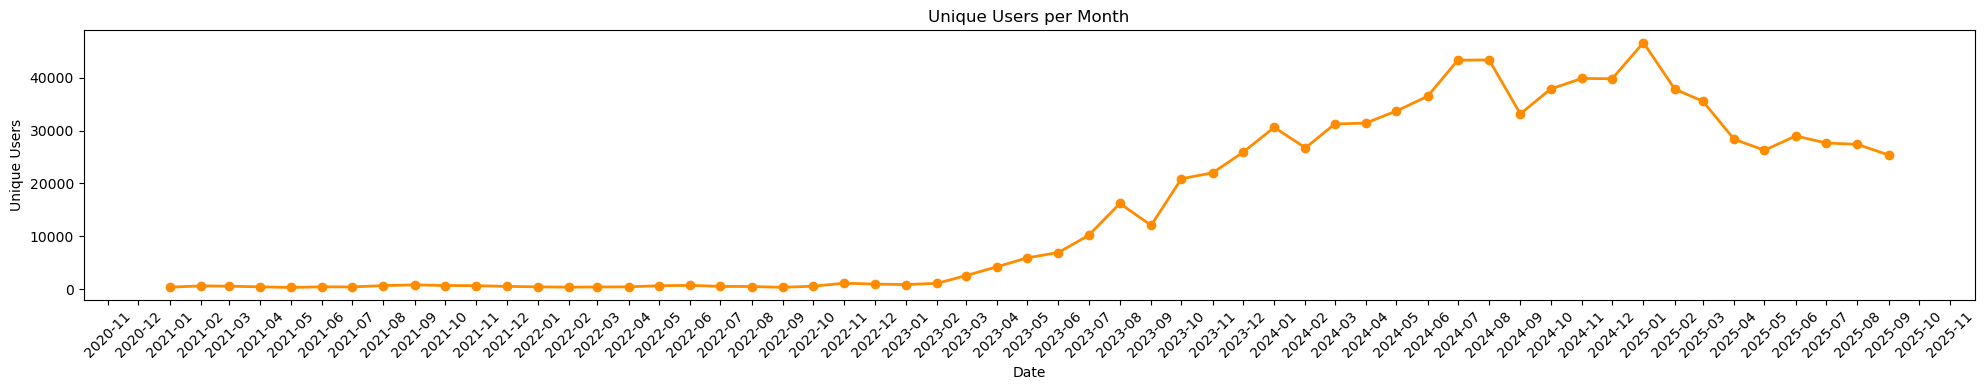

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Load the monthly summary CSV ---
monthly_users_pd = pd.read_csv(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/monthly_groups.csv"
)

# Combine year + month into a datetime column
monthly_users_pd["date"] = pd.to_datetime(
    monthly_users_pd["year"].astype(str) + "-" + monthly_users_pd["month"].astype(str) + "-01"
)

# --- Plot unique users per month ---
plt.figure(figsize=(20,4))
plt.plot(
    monthly_users_pd["date"],
    monthly_users_pd["unique_users"],
    marker="o",
    color="darkorange",
    linewidth=2,
)
plt.title("Unique Users per Month")
plt.ylabel("Unique Users")
plt.xlabel("Date")

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/unique_users_per_month.png",
    dpi=200
)
plt.show()

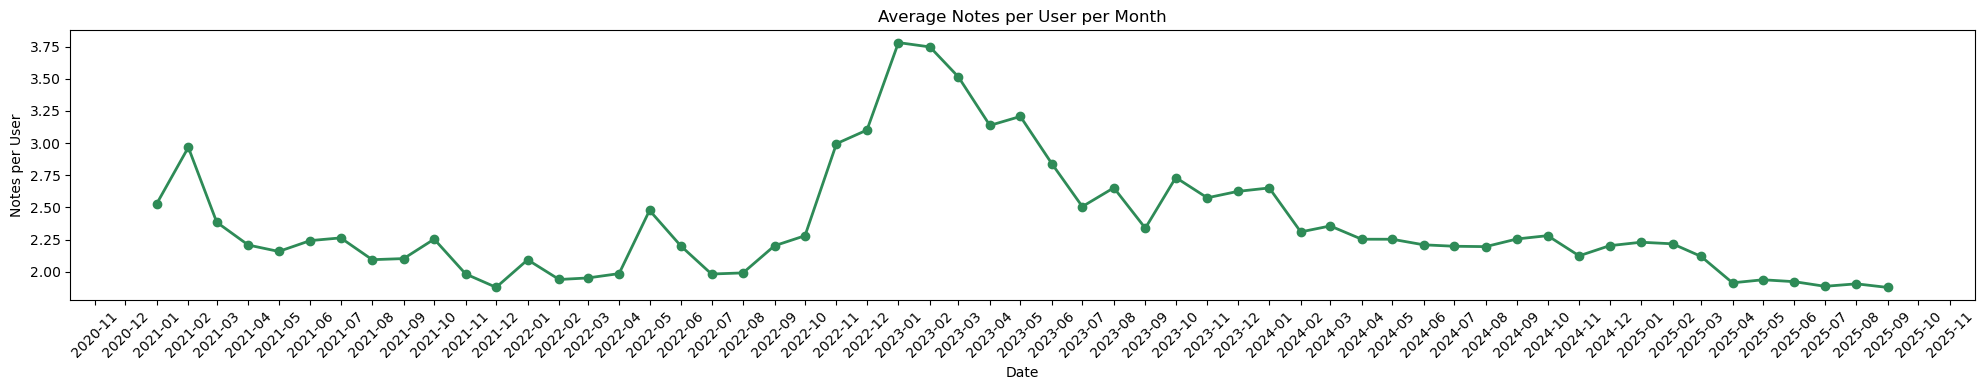

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Load CSV ---
monthly_ratio_pd = pd.read_csv(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/monthly_groups.csv"
)

# Combine year + month into a datetime column
monthly_ratio_pd["date"] = pd.to_datetime(
    monthly_ratio_pd["year"].astype(str) + "-" + monthly_ratio_pd["month"].astype(str) + "-01"
)

# --- Compute ratio ---
monthly_ratio_pd["notes_per_user"] = (
    monthly_ratio_pd["note_count"] / monthly_ratio_pd["unique_users"]
)

# --- Plot ratio over time ---
plt.figure(figsize=(20,4))
plt.plot(
    monthly_ratio_pd["date"],
    monthly_ratio_pd["notes_per_user"],
    marker="o",
    color="seagreen",
    linewidth=2,
)
plt.title("Average Notes per User per Month")
plt.ylabel("Notes per User")
plt.xlabel("Date")

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/notes_per_user_ratio.png",
    dpi=200
)
plt.show()

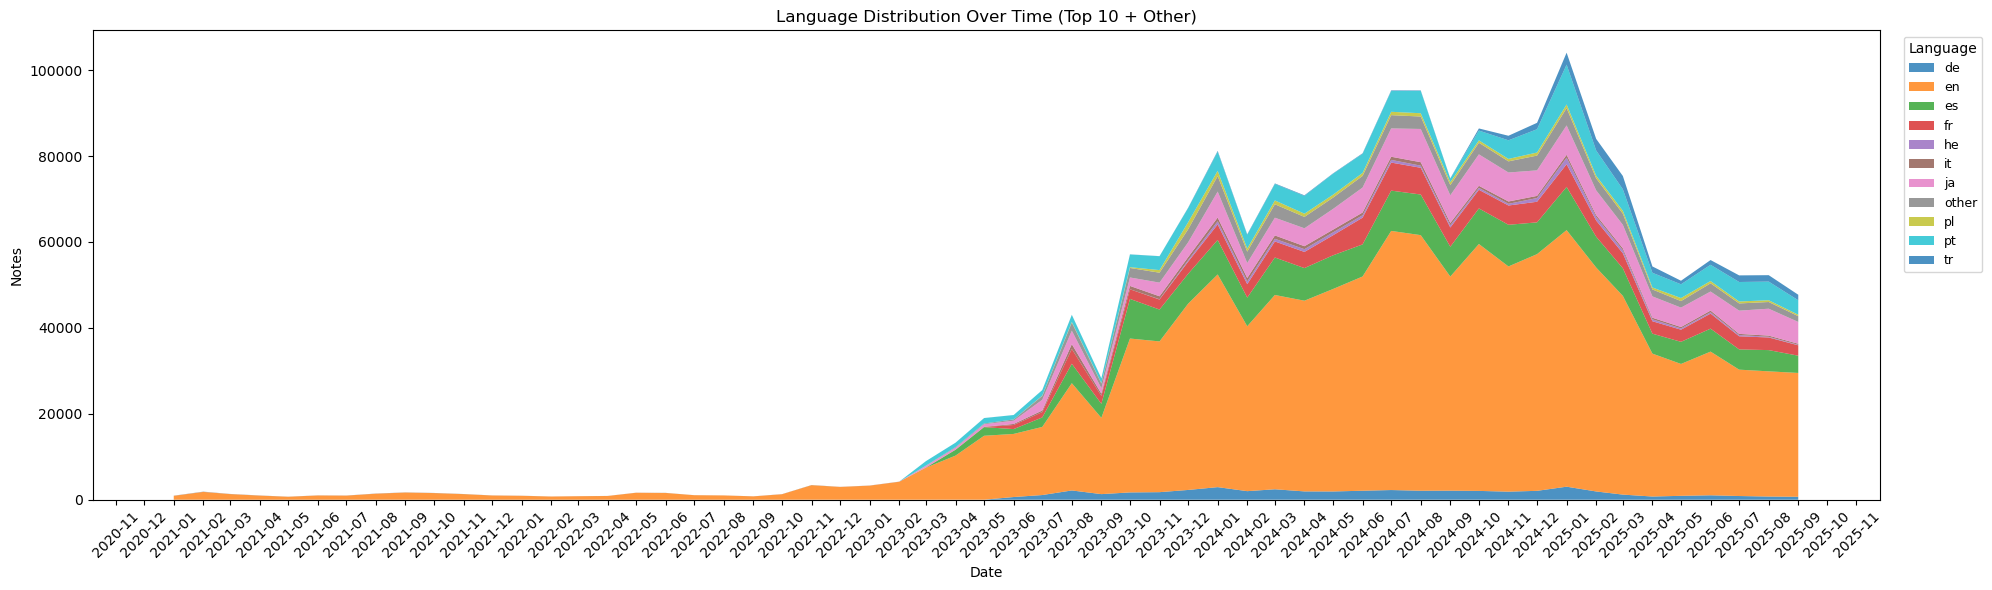

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- Load data ---
lang_df = pd.read_csv(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/top10_lang_data.csv"
)

# Ensure 'date' column is a proper datetime
lang_df["date"] = pd.to_datetime(lang_df["date"], errors="coerce")

# --- Pivot to wide format (each language = column) ---
lang_pivot = lang_df.pivot_table(
    index="date",
    columns="lang_grouped",
    values="note_count",
    aggfunc="sum",
    fill_value=0
)

# Sort by date for proper plotting
lang_pivot = lang_pivot.sort_index()

# --- Plot streamgraph (stacked area chart) ---
plt.figure(figsize=(20,6))
plt.stackplot(
    lang_pivot.index,
    lang_pivot.T,
    labels=lang_pivot.columns,
    alpha=0.8
)

plt.title("Language Distribution Over Time (Top 10 + Other)")
plt.ylabel("Notes")
plt.xlabel("Date")

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.legend(loc="upper left", bbox_to_anchor=(1.01, 1), title="Language", fontsize=9)


plt.tight_layout()

plt.savefig(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/top10_lang_streamgraph.png",
    dpi=200,
    bbox_inches="tight"
)
plt.show()


In [28]:
DATA_PATH = "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/tagged_data/notes_with_lang.parquet"

df = pl.read_parquet(DATA_PATH, glob=True)
df.head(5)

noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,misleadingManipulatedMedia,misleadingOutdatedInformation,misleadingMissingImportantContext,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote,_processing_commit_hash,_processed_at,_data_date,language_detected
i64,str,i64,i64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,str,str,str,str
1954307860424483008,"""041484D9AC90E830D68F61E7C8255C…",1754778277866,1954196884920148305,"""NOT_MISLEADING""",null,null,null,0,0,0,0,0,0,0,0,1,1,0,0,0,"""O governo petista possui vário…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""pt"""
1953448768914772250,"""D76FF869D8FDA8E851EE2756F143C7…",1754573454489,1953234688648331404,"""NOT_MISLEADING""",null,null,null,0,0,0,0,0,0,0,0,1,0,0,0,1,"""NNN - the tweet is factual, no…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""en"""
1770151239117930966,"""BA9B945F1AFAEB72036AD9042A19B9…",1710871917884,1769967075693334726,"""NOT_MISLEADING""",null,null,null,0,0,0,0,0,0,0,0,1,0,0,0,0,"""NNN if not religious nor tradi…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""en"""
1648375947278663693,"""2120901AC446B2355D745F64A4055D…",1681838425834,1648055311238848512,"""NOT_MISLEADING""",null,null,null,0,0,0,0,0,0,0,0,0,0,0,1,0,"""1) This tweet is opinion. NNN …",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""en"""
1621779533006348293,"""4E4A8661EAF375B286ECB6B742A0BC…",1675497346532,1621695555847221249,"""MISINFORMED_OR_POTENTIALLY_MIS…",null,null,null,0,0,0,0,1,0,0,0,0,0,0,0,1,"""This picture was taken in Engl…",0,"""8be5ec1f5981a578cc3ab7224eecbf…","""2025-09-27T00:00:15.686170""","""2025-09-27""","""en"""


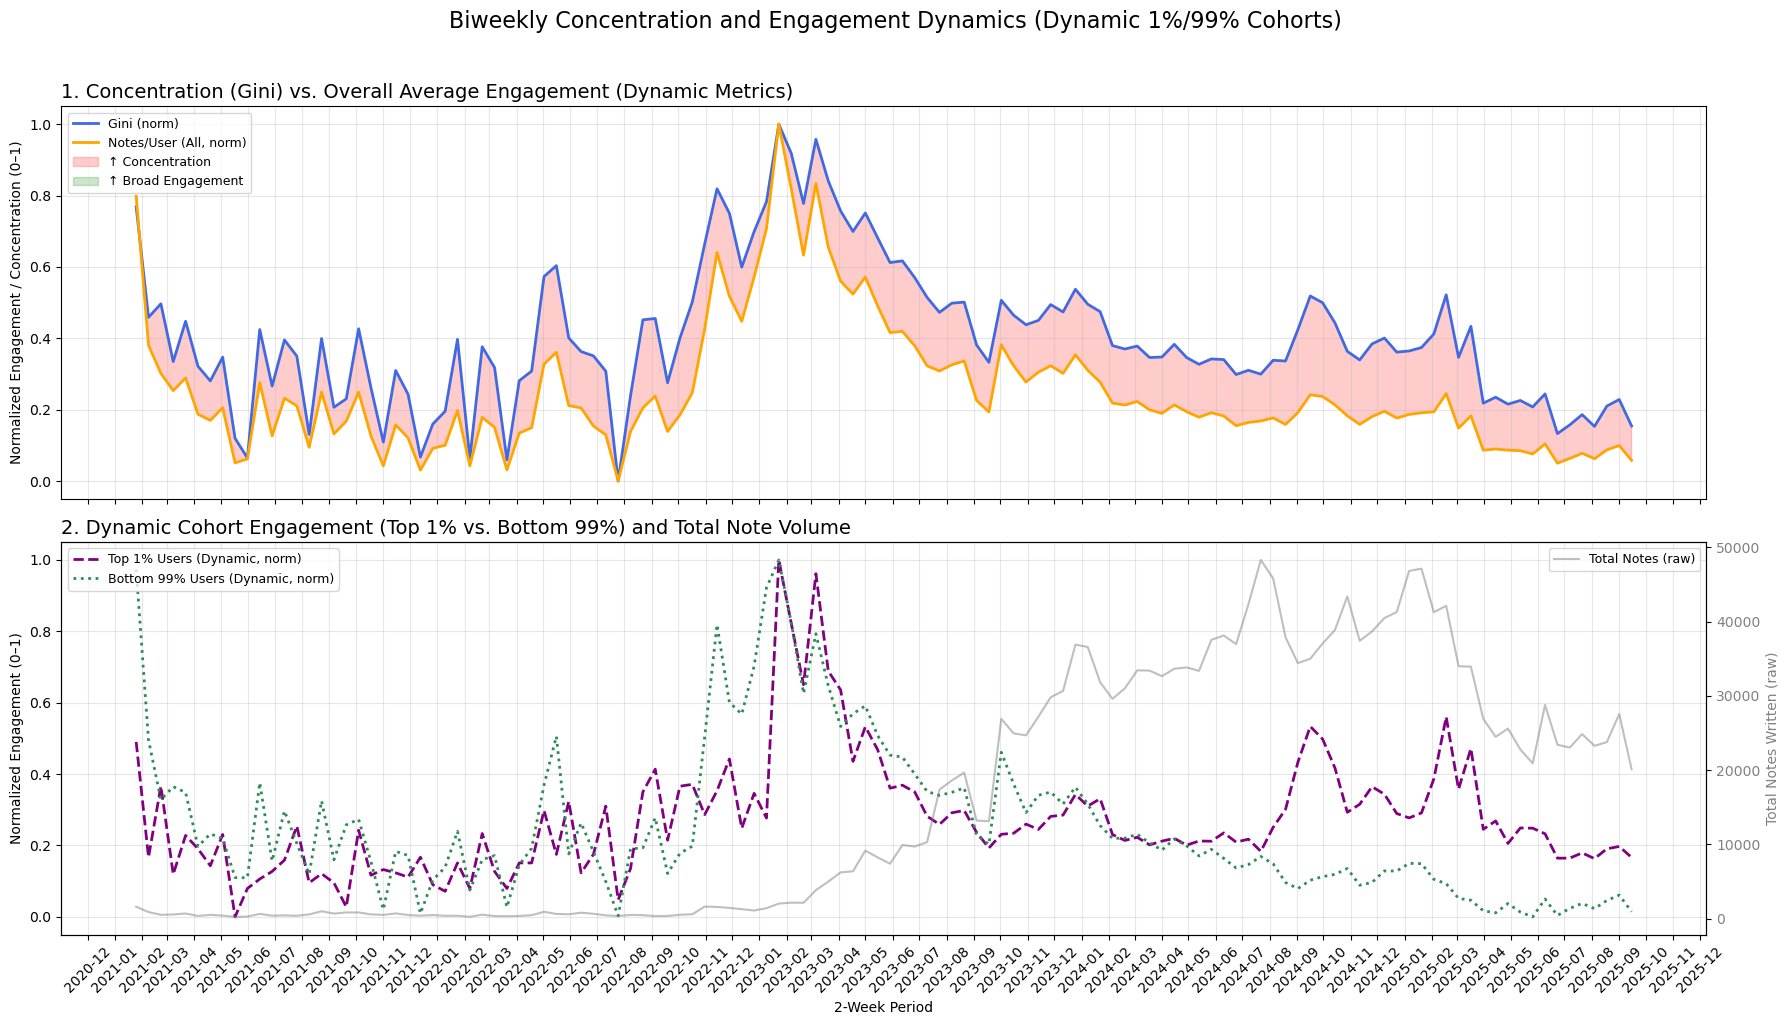

In [2]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Load Data ---
df = pl.read_parquet(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/tagged_data/notes_with_lang.parquet",
    glob=True
)


# --- 2. Prepare Bi-Weekly Data ---
df = df.with_columns(
    pl.from_epoch(pl.col("createdAtMillis"), time_unit="ms").alias("createdAt")
)
df = df.with_columns(
    pl.col("createdAt").dt.truncate("2w").alias("period")  # 2-week bins
)

# Per-user per 2-week period
user_period = (
    df.group_by(["noteAuthorParticipantId", "period"])
    .agg(pl.len().alias("note_count"))
)
# Use Pandas DataFrame for the dynamic cohort split via groupby/nlargest
pdf = user_period.to_pandas()
pl_pdf = user_period


# --- 3. Gini Helper & Main Bi-Weekly Metrics (for overall context) ---
def gini(array):
    """Calculates the Gini coefficient for an array of values."""
    array = np.array(array, dtype=np.float64)
    if len(array) == 0:
        return np.nan
    array = np.sort(array)
    n = len(array)
    idx = np.arange(1, n + 1)
    return (2 * np.sum(idx * array) / (n * np.sum(array))) - ((n + 1) / n)

# Main metrics per period (Total Notes, Unique Users, Gini, Notes/User (All))
biweekly = (
    pdf.groupby("period")
    .agg(
        total_notes=("note_count", "sum"),
        unique_users=("noteAuthorParticipantId", "nunique"),
        gini=("note_count", gini),
    )
    .reset_index()
)
biweekly["notes_per_user"] = biweekly["total_notes"] / biweekly["unique_users"]


# --- NEW BLOCK: Define and Calculate DYNAMIC 1% / 99% Cohort Engagement ---

top1percent_ratios = []
bottom99percent_ratios = []

# Iterate through each period and dynamically identify the 1% and 99%
for period, sub in pdf.groupby("period"):
    n_users = len(sub)
    if n_users == 0:
        continue

    # A. Calculate the size of the Top 1% cohort (must be at least 1)
    top_n = max(1, int(n_users * 0.01)) 
    
    # B. Identify cohorts for this period based on note count in 'sub'
    top1percent = sub.nlargest(top_n, "note_count") 
    
    # C. The remaining users form the bottom 99%
    bottom99percent = sub[~sub.index.isin(top1percent.index)]
    
    # D. Calculate rates
    # The rate is calculated using the total size of the cohort, which for Top 1% 
    # is exactly 'top_n' members active this period.
    ratio_top = top1percent["note_count"].sum() / top_n
    top1percent_ratios.append({"period": period, "notes_per_user_top1percent_dynamic": ratio_top})
    
    if len(bottom99percent) > 0:
        ratio_bottom = bottom99percent["note_count"].sum() / len(bottom99percent)
    else:
        ratio_bottom = 0
    bottom99percent_ratios.append({"period": period, "notes_per_user_bottom99percent_dynamic": ratio_bottom})

df_top_dynamic = pd.DataFrame(top1percent_ratios)
df_bottom_dynamic = pd.DataFrame(bottom99percent_ratios)

# Merge dynamic metrics back into biweekly
biweekly = biweekly.merge(df_top_dynamic, on="period", how="left").merge(df_bottom_dynamic, on="period", how="left")

# G. Normalize Metrics
for col in ["gini", "notes_per_user", "total_notes", "notes_per_user_top1percent_dynamic", "notes_per_user_bottom99percent_dynamic"]:
    # Fill NaN periods with 0 
    biweekly[col] = biweekly[col].fillna(0) 
    
    biweekly[col + "_norm"] = (
        (biweekly[col] - biweekly[col].min())
        / (biweekly[col].max() - biweekly[col].min())
    )

# Compute gap metric
biweekly["gap"] = biweekly["gini_norm"] - biweekly["notes_per_user_norm"]


# --- FINAL BLOCK: Plotting Two Graphs (Gini/All vs. Dynamic 1%/99%/Total) ---

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

# ----------------------------------------------------
# PLOT 1: Concentration (Gini) and Average Engagement (Notes/User All)
# ----------------------------------------------------
ax1.plot(biweekly["period"], biweekly["gini_norm"], label="Gini (norm)", color="royalblue", lw=2)
ax1.plot(biweekly["period"], biweekly["notes_per_user_norm"], label="Notes/User (All, norm)", color="orange", lw=2)

# Gap fill (Concentration vs. Average Engagement)
ax1.fill_between(
    biweekly["period"],
    biweekly["gini_norm"],
    biweekly["notes_per_user_norm"],
    where=biweekly["gap"] > 0,
    interpolate=True,
    color="red",
    alpha=0.2,
    label="↑ Concentration"
)
ax1.fill_between(
    biweekly["period"],
    biweekly["gini_norm"],
    biweekly["notes_per_user_norm"],
    where=biweekly["gap"] < 0,
    interpolate=True,
    color="green",
    alpha=0.2,
    label="↑ Broad Engagement"
)

ax1.set_ylabel("Normalized Engagement / Concentration (0–1)")
ax1.set_title("1. Concentration (Gini) vs. Overall Average Engagement (Dynamic Metrics)", fontsize=14, loc="left")
ax1.legend(loc="upper left", fontsize=9)
ax1.grid(alpha=0.3)


# ----------------------------------------------------
# PLOT 2: Dynamic Cohort Engagement (1% & 99%) and Total Volume
# ----------------------------------------------------

# Normalized dynamic cohort engagement lines
ax2.plot(biweekly["period"], biweekly["notes_per_user_top1percent_dynamic_norm"], 
         label="Top 1% Users (Dynamic, norm)", color="purple", lw=2, linestyle="--")
ax2.plot(biweekly["period"], biweekly["notes_per_user_bottom99percent_dynamic_norm"], 
         label="Bottom 99% Users (Dynamic, norm)", color="seagreen", lw=2, linestyle=":")
ax2.set_ylabel("Normalized Engagement (0–1)")
ax2.legend(loc="upper left", fontsize=9)
ax2.grid(alpha=0.3)
ax2.set_title("2. Dynamic Cohort Engagement (Top 1% vs. Bottom 99%) and Total Note Volume", fontsize=14, loc="left")

# Secondary axis for total note volume (on ax2)
ax3 = ax2.twinx()
ax3.plot(biweekly["period"], biweekly["total_notes"], color="gray", lw=1.5, alpha=0.5, label="Total Notes (raw)")
ax3.set_ylabel("Total Notes Written (raw)", color="gray")
ax3.tick_params(axis='y', labelcolor='gray')
ax3.legend(loc="upper right", fontsize=9)

# ----------------------------------------------------
# Shared X-Axis Formatting and Rotation
# ----------------------------------------------------

# Date formatting applied to the bottom plot (ax2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.set_xlabel("2-Week Period")

# Apply the rotation directly to the labels of the bottom axis (ax2)
ax2.tick_params(axis='x', rotation=45) 

plt.suptitle("Biweekly Concentration and Engagement Dynamics (Dynamic 1%/99% Cohorts)", fontsize=16, y=1.02)
plt.tight_layout()

# Save the new plot
plt.savefig(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/biweekly_gap_two_plots_dynamic_cohort.png",
    dpi=200, bbox_inches="tight"
)
plt.show()

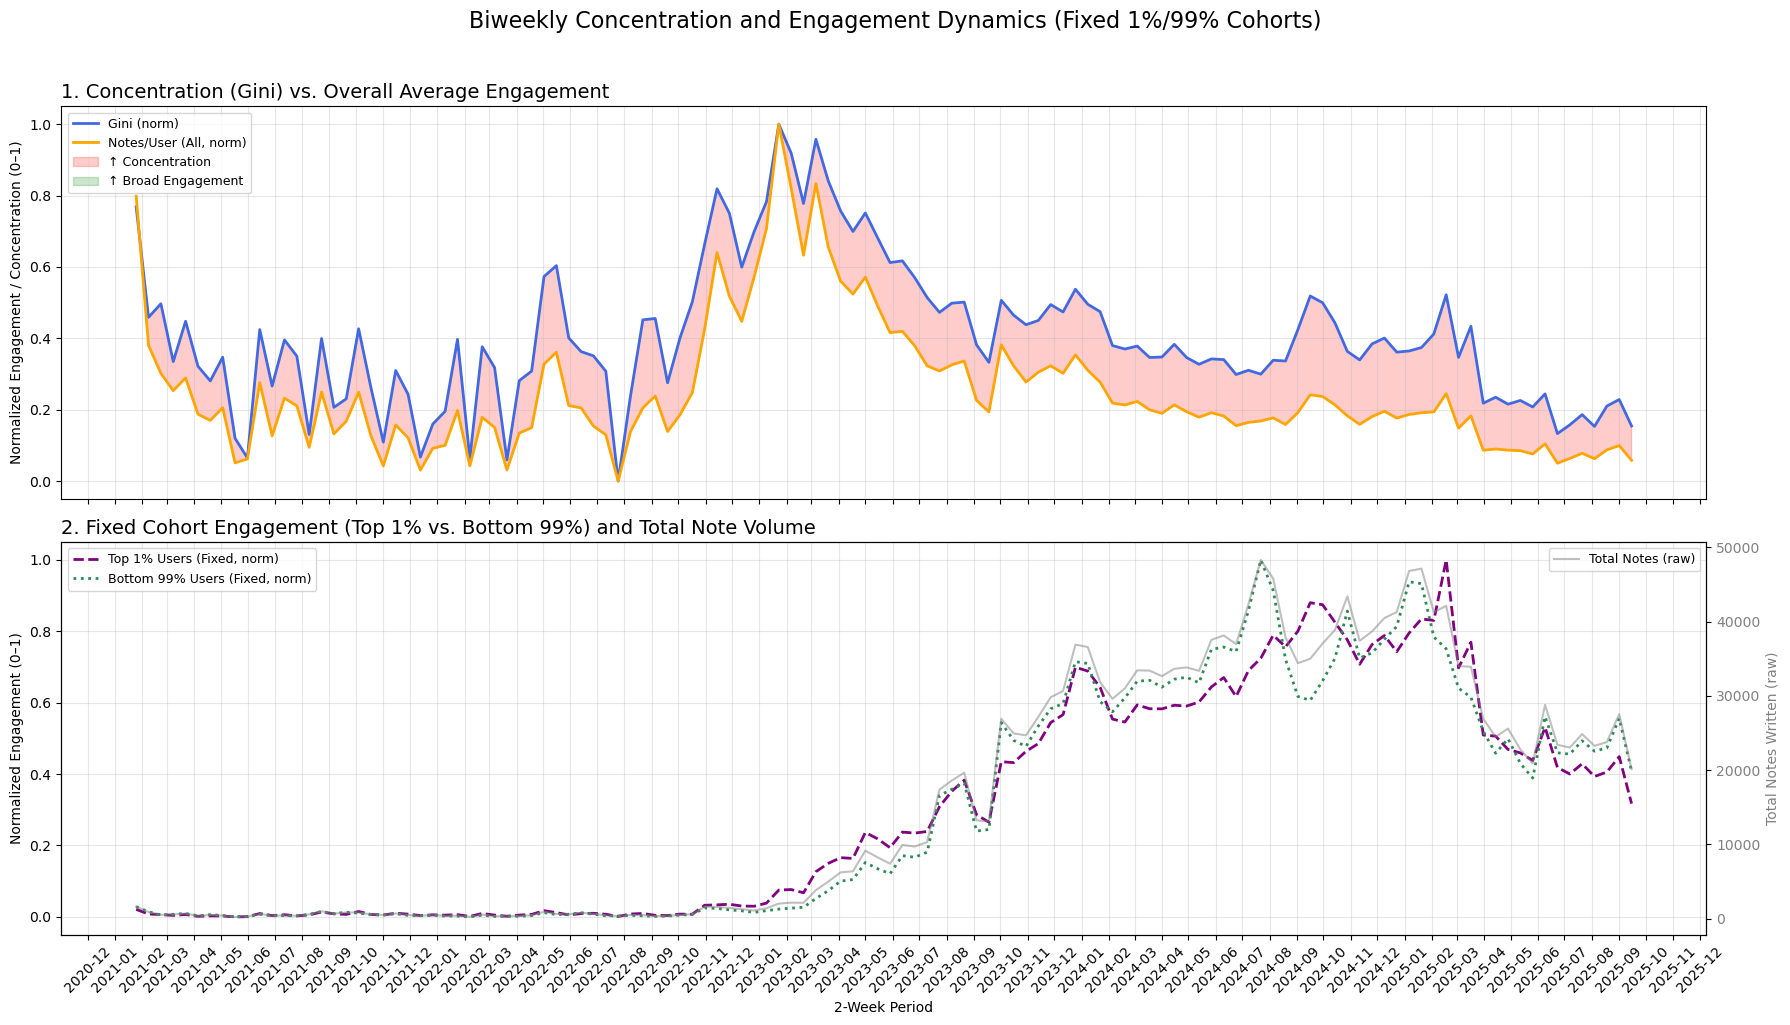

In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Load Data ---
df = pl.read_parquet(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/tagged_data/notes_with_lang.parquet",
    glob=True
)

# NOTE: Load the summary dataset to define language groups
# ADJUSTED: Changed pl.read_parquet to pl.read_csv as requested.
user_summary = pl.read_csv(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/user_language_summary_top10.csv"
)
LIFETIME_CONTRIB_COL = "total_notes" 

# --- 2. Prepare Bi-Weekly Data ---
df = df.with_columns(
    pl.from_epoch(pl.col("createdAtMillis"), time_unit="ms").alias("createdAt")
)
df = df.with_columns(
    pl.col("createdAt").dt.truncate("2w").alias("period")  # 2-week bins
)

# Per-user per 2-week period
user_period = (
    df.group_by(["noteAuthorParticipantId", "period"])
    .agg(pl.len().alias("note_count"))
)
pdf = user_period.to_pandas()
pl_pdf = user_period

# --- 3. Gini Helper & Main Bi-Weekly Metrics (for overall context) ---
def gini(array):
    """Calculates the Gini coefficient for an array of values."""
    array = np.array(array, dtype=np.float64)
    if len(array) == 0:
        return np.nan
    array = np.sort(array)
    n = len(array)
    idx = np.arange(1, n + 1)
    return (2 * np.sum(idx * array) / (n * np.sum(array))) - ((n + 1) / n)

# Main metrics per period (Total Notes, Unique Users, Gini, Notes/User (All))
biweekly = (
    pdf.groupby("period")
    .agg(
        total_notes=("note_count", "sum"),
        unique_users=("noteAuthorParticipantId", "nunique"),
        gini=("note_count", gini),
    )
    .reset_index()
)
biweekly["notes_per_user"] = biweekly["total_notes"] / biweekly["unique_users"]


# --- NEW BLOCK: Define and Calculate FIXED 1% / 99% Cohort Engagement ---

# A. Identify the total number of unique users
total_unique_users = user_summary.shape[0]

# B. Calculate the size of the Top 1% cohort
# Use max(1, ...) to ensure the cohort size is at least 1, even if the total user count is very small.
top_1_percent_n = max(1, int(total_unique_users * 0.01)) 

# C. Identify the FIXED Top 1% and Bottom 99% User IDs based on lifetime activity
lifetime_notes = (
    user_summary
    .select(["noteAuthorParticipantId", LIFETIME_CONTRIB_COL])
    .sort(LIFETIME_CONTRIB_COL, descending=True)
)

# Get the IDs for the FIXED Top 1% users
fixed_top1percent_ids = lifetime_notes.head(top_1_percent_n)["noteAuthorParticipantId"].to_list()

# Get the IDs for the Bottom 99% Users (everyone NOT in the Top 1%)
fixed_bottom99percent_ids = (
    lifetime_notes.filter(~pl.col("noteAuthorParticipantId").is_in(fixed_top1percent_ids))
    ["noteAuthorParticipantId"].to_list()
)

# D. Calculate engagement for the FIXED Top 1% cohort
top1percent_period = (
    pl_pdf.filter(pl.col("noteAuthorParticipantId").is_in(fixed_top1percent_ids))
    .group_by("period")
    .agg(pl.sum("note_count").alias("total_notes_top1percent"))
    .with_columns(
        # Denominator is the constant, fixed size of the cohort
        (pl.col("total_notes_top1percent") / pl.lit(len(fixed_top1percent_ids))).alias("notes_per_user_top1percent_fixed")
    )
).to_pandas()

# E. Calculate engagement for the FIXED Bottom 99% cohort
bottom99percent_period = (
    pl_pdf.filter(pl.col("noteAuthorParticipantId").is_in(fixed_bottom99percent_ids))
    .group_by("period")
    .agg(pl.sum("note_count").alias("total_notes_bottom99percent"))
    .with_columns(
        # Denominator is the constant, fixed size of the cohort
        (pl.col("total_notes_bottom99percent") / pl.lit(len(fixed_bottom99percent_ids))).alias("notes_per_user_bottom99percent_fixed")
    )
).to_pandas()

# F. Merge fixed metrics back into biweekly
biweekly = biweekly.merge(top1percent_period, on="period", how="left").merge(bottom99percent_period, on="period", how="left")

# G. Normalize Metrics
for col in ["gini", "notes_per_user", "total_notes", "notes_per_user_top1percent_fixed", "notes_per_user_bottom99percent_fixed"]:
    # Fill NaN periods with 0 for users who were totally inactive in a period
    biweekly[col] = biweekly[col].fillna(0) 
    
    biweekly[col + "_norm"] = (
        (biweekly[col] - biweekly[col].min())
        / (biweekly[col].max() - biweekly[col].min())
    )

# Compute gap metric
biweekly["gap"] = biweekly["gini_norm"] - biweekly["notes_per_user_norm"]


# --- FINAL BLOCK: Plotting Two Graphs (Gini/All vs. 1%/99%/Total) ---

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

# ----------------------------------------------------
# PLOT 1: Concentration (Gini) and Average Engagement (Notes/User All)
# ----------------------------------------------------
ax1.plot(biweekly["period"], biweekly["gini_norm"], label="Gini (norm)", color="royalblue", lw=2)
ax1.plot(biweekly["period"], biweekly["notes_per_user_norm"], label="Notes/User (All, norm)", color="orange", lw=2)

# Gap fill (Concentration vs. Average Engagement)
ax1.fill_between(
    biweekly["period"],
    biweekly["gini_norm"],
    biweekly["notes_per_user_norm"],
    where=biweekly["gap"] > 0,
    interpolate=True,
    color="red",
    alpha=0.2,
    label="↑ Concentration"
)
ax1.fill_between(
    biweekly["period"],
    biweekly["gini_norm"],
    biweekly["notes_per_user_norm"],
    where=biweekly["gap"] < 0,
    interpolate=True,
    color="green",
    alpha=0.2,
    label="↑ Broad Engagement"
)

ax1.set_ylabel("Normalized Engagement / Concentration (0–1)")
ax1.set_title("1. Concentration (Gini) vs. Overall Average Engagement", fontsize=14, loc="left")
ax1.legend(loc="upper left", fontsize=9)
ax1.grid(alpha=0.3)


# ----------------------------------------------------
# PLOT 2: Fixed Cohort Engagement (1% & 99%) and Total Volume
# ----------------------------------------------------

# Normalized fixed cohort engagement lines (using 1% and 99% columns)
ax2.plot(biweekly["period"], biweekly["notes_per_user_top1percent_fixed_norm"], 
         label="Top 1% Users (Fixed, norm)", color="purple", lw=2, linestyle="--")
ax2.plot(biweekly["period"], biweekly["notes_per_user_bottom99percent_fixed_norm"], 
         label="Bottom 99% Users (Fixed, norm)", color="seagreen", lw=2, linestyle=":")
ax2.set_ylabel("Normalized Engagement (0–1)")
ax2.legend(loc="upper left", fontsize=9)
ax2.grid(alpha=0.3)
ax2.set_title("2. Fixed Cohort Engagement (Top 1% vs. Bottom 99%) and Total Note Volume", fontsize=14, loc="left")

# Secondary axis for total note volume (on ax2)
ax3 = ax2.twinx()
ax3.plot(biweekly["period"], biweekly["total_notes"], color="gray", lw=1.5, alpha=0.5, label="Total Notes (raw)")
ax3.set_ylabel("Total Notes Written (raw)", color="gray")
ax3.tick_params(axis='y', labelcolor='gray')
ax3.legend(loc="upper right", fontsize=9)

# ----------------------------------------------------
# Shared X-Axis Formatting and Rotation
# ----------------------------------------------------

# Date formatting applied to the bottom plot (ax2)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.set_xlabel("2-Week Period")

# Apply the rotation directly to the labels of the bottom axis (ax2)
ax2.tick_params(axis='x', rotation=45) 

plt.suptitle("Biweekly Concentration and Engagement Dynamics (Fixed 1%/99% Cohorts)", fontsize=16, y=1.02)
plt.tight_layout()

# Save the new plot
plt.savefig(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/biweekly_gap_two_plots_1percent_cohort.png",
    dpi=200, bbox_inches="tight"
)
plt.show()

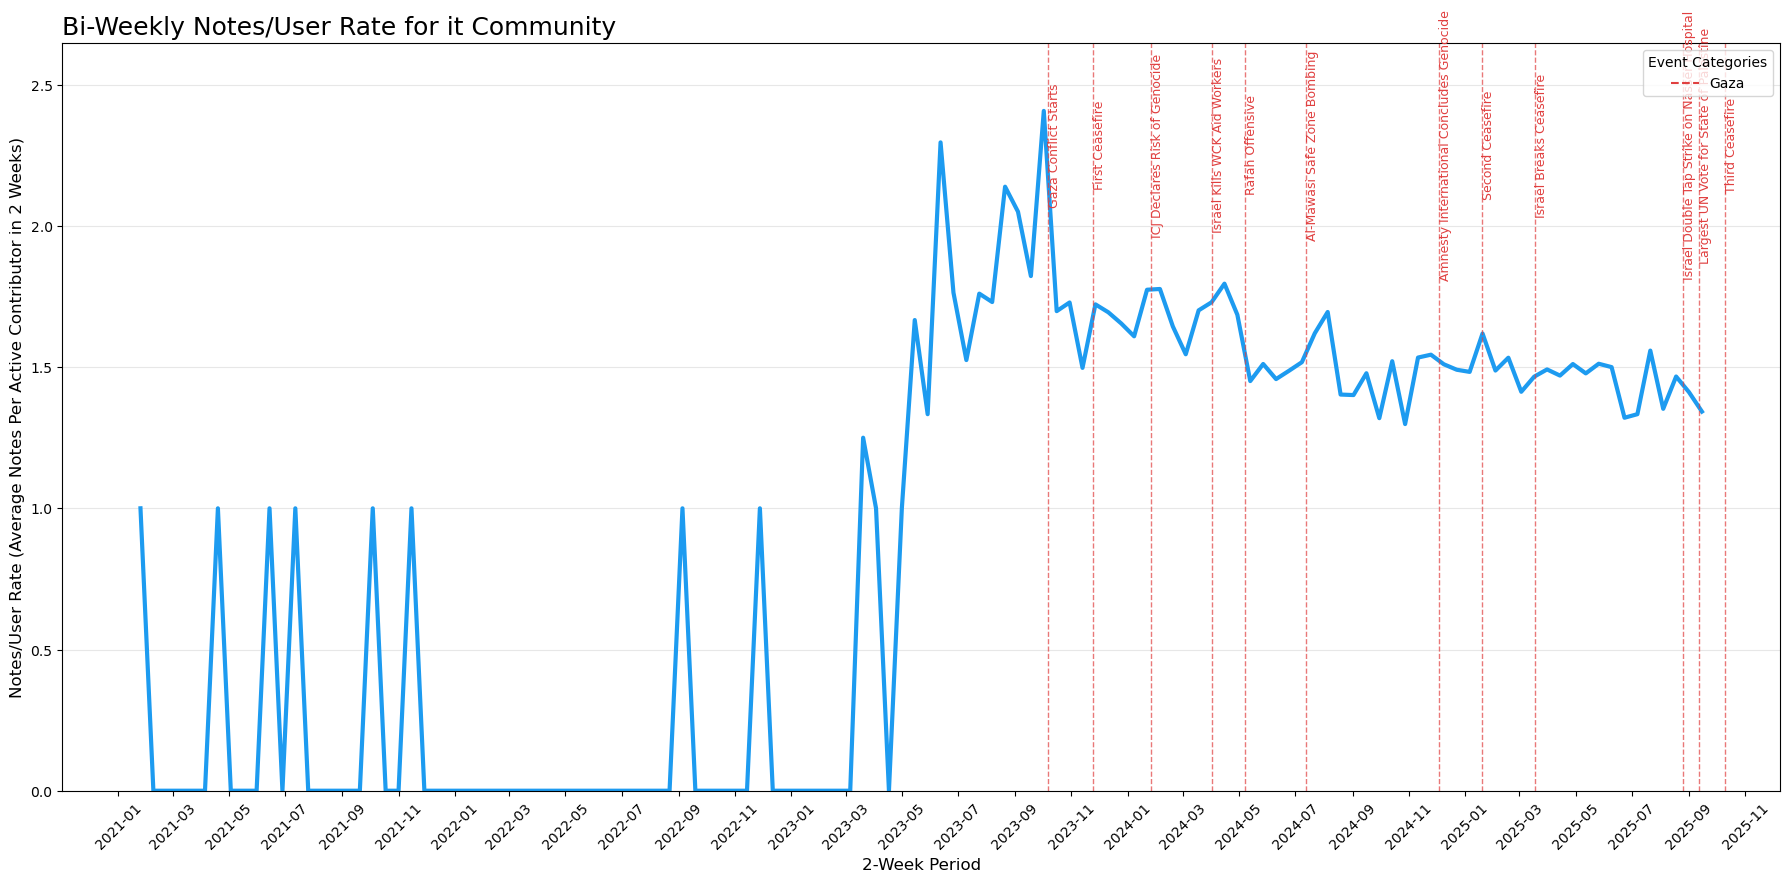

In [40]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# ====================================================================
# --- CONFIGURATION SECTION ---
# ====================================================================

# 1. TARGET LANGUAGE SELECTION
# Edit this variable to plot a different language: ["ja", "pt", "fr", "de", "pl", "es", "en", "tr", "it", "he", "other"]
TARGET_LANGUAGE = "it"

# 2. GLOBAL EVENT TOGGLES (Set to True or False)
PLOT_TECH_EVENTS = False      # Controls Grok/X/Tech-related events
PLOT_GAZA_EVENTS = True       # Controls Gaza Conflict-related events
PLOT_US_POLITICS_EVENTS = False # Controls US Politics-related events

# 3. LANGUAGE-SPECIFIC TOGGLE AND DEFINITION
PLOT_CUSTOM_EVENTS = True     # Controls the display of events defined below
LANGUAGE_SPECIFIC_EVENTS = [
    # Edit these dictionaries to define custom events for the TARGET_LANGUAGE
]


# ====================================================================
# --- EVENT DEFINITIONS AND FILTERING ---
# ====================================================================

# GLOBAL EVENT LISTS (Do not edit directly)
GLOBAL_EVENTS_DEFINITIONS = [
    # Tech/Twitter Events (Blue)
    {"date": "2023-01-19", "label": "Note Visibility for All", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2023-05-31", "label": "Community Notes Covers Images", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2023-10-11", "label": "Scoring Architecture Overhaul", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-04-18", "label": "Locks and Flags on Low Quality Notes", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-05-17", "label": "Twitter Changed to X", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-07-15", "label": "Notes Requests Launched", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-10-08", "label": "Lightning Fast Notes", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-12-06", "label": "Grok Released to All Users", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-01-03", "label": "Musk Changes Algorithm to Lower Negativity", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-02-20", "label": "Musk Changes Algorithm Due to 'Gamed' Control", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-04-01", "label": "Minimum Diverse Perspective Ratings", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-08-28", "label": "AI Note Writers", "category": "Twitter", "color": "#1D9BF0"},

    
    # Gaza Conflict Events (Red)
    {"date": "2023-10-07", "label": "Gaza Conflict Starts", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2023-11-24", "label": "First Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-01-26", "label": "ICJ Declares Risk of Genocide", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-04-01", "label": "Israel Kills WCK Aid Workers", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-05-07", "label": "Rafah Offensive", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-07-13", "label": "Al-Mawasi Safe Zone Bombing", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-12-04", "label": "Amnesty International Concludes Genocide", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-01-19", "label": "Second Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-03-18", "label": "Israel Breaks Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-08-25", "label": "Israel Double Tap Strike on Nasser Hospital", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-09-12", "label": "Largest UN Vote for State of Palestine", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-10-10", "label": "Third Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    
    # US Politics Events (Green)
    {"date": "2023-03-30", "label": "Trump Indictment For Hush Money", "category": "US Politics", "color": "#16A085"},
    {"date": "2023-09-12", "label": "Biden Impeachment Inquiry", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-01-15", "label": "Trump Overwhelmingly Wins Iowa Caucus", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-04-18", "label": "Pro-Palestine US Campus Protests", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-07-21", "label": "Biden Withdrawal", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-08-05", "label": "Kamala Harris Nominated", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-11-05", "label": "Election Day", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-01-20", "label": "Trump Takes Office for Second Term", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-04-05", "label": "First Major Anti-Trump 2.0 Protests", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-06-06", "label": "ICE Raids Ramp Up", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-09-10", "label": "Charlie Kirk Killed", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-10-01", "label": "Oct 2025 Gov Shutdown", "category": "US Politics", "color": "#16A085"},
]

# COMBINE AND FILTER EVENTS BASED ON TOGGLES
event_categories = []
event_categories_str = ""
EVENT_DATES = []
if PLOT_TECH_EVENTS:
    EVENT_DATES.extend([e for e in GLOBAL_EVENTS_DEFINITIONS if e['category'] == 'Twitter'])
    event_categories.append("Twitter")
if PLOT_GAZA_EVENTS:
    EVENT_DATES.extend([e for e in GLOBAL_EVENTS_DEFINITIONS if e['category'] == 'Gaza'])
    event_categories.append("Gaza")
if PLOT_US_POLITICS_EVENTS:
    EVENT_DATES.extend([e for e in GLOBAL_EVENTS_DEFINITIONS if e['category'] == 'US Politics'])
    event_categories.append("US Politics")
if PLOT_CUSTOM_EVENTS:
    EVENT_DATES.extend(LANGUAGE_SPECIFIC_EVENTS)
for i in event_categories:
    event_categories_str = event_categories_str + i + "_"

# Convert date strings to datetime objects for plotting
for event in EVENT_DATES:
    event["dt"] = datetime.strptime(event["date"], "%Y-%m-%d")

# --- END CONFIGURATION SECTION ---
# ====================================================================


# --- 2. Load Data ---
df = pl.read_parquet(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/tagged_data/notes_with_lang.parquet",
    glob=True
)

# Load the summary dataset to define language groups (Required for this analysis)
try:
    user_summary = pl.read_csv(
        "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/user_language_summary_top10.csv"
    )
    LIFETIME_CONTRIB_COL = "total_notes"
except Exception as e:
    print(f"Error loading user_language_summary_top10.csv: {e}")
    # Create a minimal fallback structure if loading fails to prevent crash
    user_summary = pl.DataFrame({"noteAuthorParticipantId": [], "main_language": [], "total_notes": []})
    LIFETIME_CONTRIB_COL = "total_notes"


# --- 3. Prepare Bi-Weekly Data ---
df = df.with_columns(
    pl.from_epoch(pl.col("createdAtMillis"), time_unit="ms").alias("createdAt")
)
df = df.with_columns(
    pl.col("createdAt").dt.truncate("2w").alias("period")  # 2-week bins
)

# Per-user per 2-week period
user_period = (
    df.group_by(["noteAuthorParticipantId", "period"])
    .agg(pl.len().alias("note_count"))
)
# Use Polars DataFrame for efficient merging
pl_pdf = user_period


# --- 4. Language-Specific Note Rate Analysis ---

# A. Identify the top 10 languages based on lifetime note count in the summary
top10_languages = (
    user_summary
    .group_by("main_language")
    .agg(pl.sum(LIFETIME_CONTRIB_COL).alias("total_lang_notes"))
    .sort("total_lang_notes", descending=True)
    .head(10)["main_language"]
    .to_list()
)
language_groups = top10_languages + ["Other"]

# B. Create a mapping DataFrame from user_summary (user ID -> main_language)
lang_map = user_summary.select(["noteAuthorParticipantId", "main_language"]).unique()

# C. Merge language tag onto the bi-weekly user data (pl_pdf)
pl_pdf_lang = pl_pdf.join(lang_map, on="noteAuthorParticipantId", how="left")

# D. Create the "Other" category for non-top-10 languages
pl_pdf_lang = pl_pdf_lang.with_columns(
    pl.when(pl.col("main_language").is_in(top10_languages))
    .then(pl.col("main_language"))
    .otherwise(pl.lit("Other"))
    .alias("language_group")
)

# E. Calculate bi-weekly note rate per language group (11 groups)
language_rates_df = (
    pl_pdf_lang.group_by(["period", "language_group"])
    .agg(
        pl.sum("note_count").alias("total_notes_lang"),
        pl.count("noteAuthorParticipantId").alias("unique_users_lang")
    )
    .with_columns(
        # Note rate = Total Notes / Unique Users in that language/period
        (pl.col("total_notes_lang") / pl.col("unique_users_lang")).alias("notes_per_user_rate")
    )
).to_pandas()

# Get all unique periods for reindexing
all_periods = pl_pdf["period"].unique().to_pandas().sort_values()


# --- 5. Plotting Single Language Graph ---

# Filter data for the single target language
lang_data = language_rates_df[language_rates_df["language_group"] == TARGET_LANGUAGE].copy()

# Ensure all periods are represented, filling missing periods with 0 rate
lang_data = lang_data.set_index("period").reindex(all_periods).fillna(0).reset_index()
lang_data.rename(columns={'index': 'period'}, inplace=True)

# Setup figure and axis (single plot)
fig, ax = plt.subplots(1, 1, figsize=(18, 9))

# Calculate the max rate for consistent text placement
GLOBAL_MAX_RATE = lang_data["notes_per_user_rate"].max()
TEXT_Y_POSITION = GLOBAL_MAX_RATE * 0.95 # Place text near the top
Y_LIM_UPPER = GLOBAL_MAX_RATE * 1.1 # Extend y-axis for text clearance

# Plot the note rate
ax.plot(lang_data["period"], lang_data["notes_per_user_rate"], lw=3, color="#1D9BF0")

# Set y-axis limits to ensure consistent scaling and text clearance
ax.set_ylim(0, Y_LIM_UPPER)

# --- INTEGRATE HISTORICAL EVENT LINES and ANNOTATIONS ---
event_legend_handles = []
event_legend_labels = []

for event in EVENT_DATES:
    ax.axvline(x=event["dt"], color=event["color"], linestyle='--', linewidth=1, alpha=0.7)
    
    # ADD TEXT LABEL ANNOTATION
    ax.text(
        event["dt"], 
        TEXT_Y_POSITION, 
        event["label"], 
        color=event["color"], 
        rotation=90, 
        fontsize=9,
        ha='left', # Horizontal alignment: start text just after the line
        va='center', # Vertical alignment
    )
    
    # Collect legend info for the event lines
    event_category = event["category"]
    # We only add the category once to the legend
    if event_category not in event_legend_labels:
        event_legend_handles.append(plt.Line2D([0], [0], color=event["color"], linestyle='--', linewidth=1.5))
        event_legend_labels.append(event_category)


# Formatting
ax.set_title(f"Bi-Weekly Notes/User Rate for {TARGET_LANGUAGE} Community", loc='left', fontsize=18)
ax.grid(alpha=0.3, axis='y')
ax.set_ylabel("Notes/User Rate (Average Notes Per Active Contributor in 2 Weeks)", fontsize=12)
ax.set_xlabel("2-Week Period", fontsize=12)

# X-axis formatting 
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.tick_params(axis='x', rotation=45) 

# Add the event legend
ax.legend(event_legend_handles, event_legend_labels, loc='upper right', title="Event Categories", fontsize=10)

plt.tight_layout()

plt.show()

In [21]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import os

# ================================================================
# --- LOAD DATA ONCE ---
# ================================================================

df = pl.read_parquet(
    "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/tagged_data/notes_with_lang.parquet",
    glob=True
)

try:
    user_summary = pl.read_csv(
        "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/post_tagging_summary/user_language_summary_top10.csv"
    )
    LIFETIME_CONTRIB_COL = "total_notes"
except Exception as e:
    print(f"Error loading user_language_summary_top10.csv: {e}")
    user_summary = pl.DataFrame({"noteAuthorParticipantId": [], "main_language": [], "total_notes": []})
    LIFETIME_CONTRIB_COL = "total_notes"

# ================================================================
# --- PREPROCESS: 2-Week Periods ---
# ================================================================
df = df.with_columns(
    pl.from_epoch(pl.col("createdAtMillis"), time_unit="ms").alias("createdAt")
)
df = df.with_columns(
    pl.col("createdAt").dt.truncate("2w").alias("period")
)

user_period = (
    df.group_by(["noteAuthorParticipantId", "period"])
    .agg(pl.len().alias("note_count"))
)
pl_pdf = user_period

# ================================================================
# --- LANGUAGE GROUPS ---
# ================================================================
top10_languages = (
    user_summary
    .group_by("main_language")
    .agg(pl.sum(LIFETIME_CONTRIB_COL).alias("total_lang_notes"))
    .sort("total_lang_notes", descending=True)
    .head(10)["main_language"]
    .to_list()
)
language_groups = top10_languages + ["Other"]

lang_map = user_summary.select(["noteAuthorParticipantId", "main_language"]).unique()
pl_pdf_lang = pl_pdf.join(lang_map, on="noteAuthorParticipantId", how="left")

pl_pdf_lang = pl_pdf_lang.with_columns(
    pl.when(pl.col("main_language").is_in(top10_languages))
    .then(pl.col("main_language"))
    .otherwise(pl.lit("Other"))
    .alias("language_group")
)

language_rates_df = (
    pl_pdf_lang.group_by(["period", "language_group"])
    .agg(
        pl.sum("note_count").alias("total_notes_lang"),
        pl.count("noteAuthorParticipantId").alias("unique_users_lang")
    )
    .with_columns(
        (pl.col("total_notes_lang") / pl.col("unique_users_lang")).alias("notes_per_user_rate")
    )
).to_pandas()

all_periods = pl_pdf["period"].unique().to_pandas().sort_values()

# ================================================================
# --- GLOBAL EVENT DEFINITIONS ---
# ================================================================
GLOBAL_EVENTS_DEFINITIONS = [
    # Tech/X Events
    {"date": "2023-01-19", "label": "Note Visibility for All", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2023-05-31", "label": "Community Notes Covers Images", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2023-10-11", "label": "Scoring Architecture Overhaul", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-04-18", "label": "Locks and Flags on Low Quality Notes", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-05-17", "label": "Twitter Changed to X", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-07-15", "label": "Notes Requests Launched", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-10-08", "label": "Lightning Fast Notes", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2024-12-06", "label": "Grok Released to All Users", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-01-03", "label": "Musk Changes Algorithm to Lower Negativity", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-02-20", "label": "Musk Changes Algorithm Due to 'Gamed' Control", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-04-01", "label": "Minimum Diverse Perspective Ratings", "category": "Twitter", "color": "#1D9BF0"},
    {"date": "2025-08-28", "label": "AI Note Writers", "category": "Twitter", "color": "#1D9BF0"},
    # Gaza Events
    {"date": "2023-10-07", "label": "Gaza Conflict Starts", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2023-11-24", "label": "First Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-01-26", "label": "ICJ Declares Risk of Genocide", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-04-01", "label": "Israel Kills WCK Aid Workers", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-05-07", "label": "Rafah Offensive", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-07-13", "label": "Al-Mawasi Safe Zone Bombing", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2024-12-04", "label": "Amnesty International Concludes Genocide", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-01-19", "label": "Second Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-03-18", "label": "Israel Breaks Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-08-25", "label": "Israel Double Tap Strike on Nasser Hospital", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-09-12", "label": "Largest UN Vote for State of Palestine", "category": "Gaza", "color": "#E03F3F"},
    {"date": "2025-10-10", "label": "Third Ceasefire", "category": "Gaza", "color": "#E03F3F"},
    # US Politics
    {"date": "2023-03-30", "label": "Trump Indictment For Hush Money", "category": "US Politics", "color": "#16A085"},
    {"date": "2023-09-12", "label": "Biden Impeachment Inquiry", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-01-15", "label": "Trump Overwhelmingly Wins Iowa Caucus", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-04-18", "label": "Pro-Palestine US Campus Protests", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-07-21", "label": "Biden Withdrawal", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-08-05", "label": "Kamala Harris Nominated", "category": "US Politics", "color": "#16A085"},
    {"date": "2024-11-05", "label": "Election Day", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-01-20", "label": "Trump Takes Office for Second Term", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-04-05", "label": "First Major Anti-Trump 2.0 Protests", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-06-06", "label": "ICE Raids Ramp Up", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-09-10", "label": "Charlie Kirk Killed", "category": "US Politics", "color": "#16A085"},
    {"date": "2025-10-01", "label": "Oct 2025 Gov Shutdown", "category": "US Politics", "color": "#16A085"},
]

# ================================================================
# --- LOOP OVER LANGUAGES AND EVENT SETS ---
# ================================================================
output_dir = "/home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries"
os.makedirs(output_dir, exist_ok=True)

event_sets = {
    "Tech": ["Twitter"],
    "Gaza": ["Gaza"],
    "Politics": ["US Politics"]
}

for lang in language_groups:
    for set_name, categories in event_sets.items():
        # Prepare events for this category
        EVENT_DATES = [e for e in GLOBAL_EVENTS_DEFINITIONS if e["category"] in categories]
        for e in EVENT_DATES:
            e["dt"] = datetime.strptime(e["date"], "%Y-%m-%d")

        lang_data = language_rates_df[language_rates_df["language_group"] == lang].copy()
        lang_data = lang_data.set_index("period").reindex(all_periods).fillna(0).reset_index()
        lang_data.rename(columns={'index': 'period'}, inplace=True)

        fig, ax = plt.subplots(1, 1, figsize=(18, 9))

        GLOBAL_MAX_RATE = lang_data["notes_per_user_rate"].max()
        TEXT_Y_POSITION = GLOBAL_MAX_RATE * 0.95
        Y_LIM_UPPER = GLOBAL_MAX_RATE * 1.1 if GLOBAL_MAX_RATE > 0 else 1

        ax.plot(lang_data["period"], lang_data["notes_per_user_rate"], lw=3, color="#1D9BF0")
        ax.set_ylim(0, Y_LIM_UPPER)

        event_legend_handles, event_legend_labels = [], []
        for ev in EVENT_DATES:
            ax.axvline(x=ev["dt"], color=ev["color"], linestyle="--", linewidth=1, alpha=0.7)
            ax.text(ev["dt"], TEXT_Y_POSITION, ev["label"], color=ev["color"],
                    rotation=90, fontsize=9, ha="left", va="center")
            if ev["category"] not in event_legend_labels:
                event_legend_handles.append(plt.Line2D([0], [0], color=ev["color"], linestyle="--", linewidth=1.5))
                event_legend_labels.append(ev["category"])

        ax.set_title(f"Bi-Weekly Notes/User Rate for {lang} | {set_name} Events", loc="left", fontsize=18)
        ax.grid(alpha=0.3, axis="y")
        ax.set_ylabel("Notes/User Rate (Avg Notes per Active User in 2 Weeks)", fontsize=12)
        ax.set_xlabel("2-Week Period", fontsize=12)
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
        ax.tick_params(axis="x", rotation=45)
        ax.legend(event_legend_handles, event_legend_labels, loc="upper right", title="Event Categories", fontsize=10)

        plt.tight_layout()
        filename = f"{output_dir}/note_rate_{lang}_{set_name}_events.png"
        plt.savefig(filename, dpi=200, bbox_inches="tight")
        plt.close(fig)
        print(f"✅ Saved {filename}")


✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_en_Tech_events.png
✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_en_Gaza_events.png
✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_en_Politics_events.png
✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_es_Tech_events.png
✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_es_Gaza_events.png
✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_es_Politics_events.png
✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_ja_Tech_events.png
✅ Saved /home/jovyan/Shared/project1-group1/info-470-project-1/langdata/language-timeseries/note_rate_ja_Gaza_events.png
✅ Saved /home/jovyan/Sha